# Libraries & Global variables

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import cv2
import json

import os
import time

# from sklearn.model_selection import train_test_split

# %load_ext autoreload
# %autoreload 2
# import FusionModel_tools as fm
# import importlib
# importlib.reload(fm)

# import nltk
# nltk.download('popular', quiet = True)


In [2]:
## define general parameters

myseed = 123

splitting_path = '../Splitted_datasets/'
preprocessing_path = '../Preprocessed_data/'
training_path = '../Trained_models_and_metrics/'


# Reloading datasets: 
**Chose at which stage the dataset is goind to be imported:**
* Raw data after train - test splitting.  
* Preprocessed datasets after cleaning and feature engineering.  
* Transformed datasets into np.arrays and/or sparce matrices ready to feed into the ML models

## Option_1: Raw datasets after train - test spliting

In [3]:
# df_X_train = pd.read_csv(splitting_path + '2308141811_df_X_train.csv', index_col = 0, header = 0)
# df_X_test = pd.read_csv(splitting_path + '2308141811_df_X_test.csv', index_col = 0, header = 0)
# df_y_train = pd.read_csv(splitting_path + '2308141811_df_y_train.csv', index_col = 0, header = 0)
# df_y_test = pd.read_csv(splitting_path + '2308141811_df_y_test.csv', index_col = 0, header = 0)

In [4]:
# print(df_X_train.index)
# df_X_train.head()

In [5]:
# print(df_X_test.index)
# df_X_test.head()

In [6]:
# print(df_y_train.index)
# df_y_train.head()

In [7]:
# print(df_y_test.index)
# df_y_test.head()

## Option_2: preprocessed dataset after feature engineering
Include target dataset if not imported before.

In [3]:
# df_X_train_preprocess = pd.read_csv(preprocessing_path+'2308141824_df_X_train_preprocess.csv', header = 0, index_col = 0, sep = ',')
# df_X_test_preprocess = pd.read_csv(preprocessing_path+'2308141824_df_X_test_preprocess.csv', header = 0, index_col = 0, sep = ',')
df_y_train = pd.read_csv( splitting_path+'2308141811_df_y_train.csv', header = 0, index_col = 0, sep = ',')
df_y_test = pd.read_csv( splitting_path+'2308141811_df_y_test.csv', header = 0, index_col = 0, sep = ',')

In [9]:
# print(df_X_train_preprocess.index)
# df_X_train_preprocess.head()

In [10]:
# print(df_X_test_preprocess.index)
# df_X_test_preprocess.head()

## Option_3: Transformed data, ready to feed into the ML models
Uncomment cells below to verify consistency of the imported datasets or the properties of the associated transformers

**Features**

In [10]:
# from scipy import sparse

# text_data = {}

# text_data['X_train'] = sparse.load_npz("../Preprocessed_data/2308141825_text_data_transformed_X_train.npz")
# text_data['X_test'] = sparse.load_npz("../Preprocessed_data/2308141825_text_data_transformed_X_test.npz")

In [12]:
# print(text_data['X_train'].shape)
# text_data['X_train'].toarray()[14,:25]

In [13]:
# print(text_data['X_test'].shape)
# text_data['X_test'].toarray()[14,:25]

**Targets**

In [6]:
# targets = {}
# targets['y_train'] = np.load("../Preprocessed_data/2308141825_text_data_transformed_y_train.npy")
# targets['y_test'] = np.load("../Preprocessed_data/2308141825_text_data_transformed_y_test.npy")

In [15]:
# print(targets['y_train'].shape)
# print(targets['y_train'][:5,:])
# print(targets['y_train'][:5,:].argmax(axis = 1))

In [16]:
# print(targets['y_test'].shape)
# print(targets['y_test'][:5,:])
# print(targets['y_test'][:5,:].argmax(axis = 1))

**Transformers**

In [18]:
import joblib

# token_len_scaler = joblib.load("../Preprocessed_data/2308141825_token_len_scaler")
# language_encoder = joblib.load("../Preprocessed_data/2308141825_language_encoder")
# lemmas_vectorizer = joblib.load("../Preprocessed_data/2308141825_lemmas_vectorizer")
target_encoder = joblib.load("../Preprocessed_data/2308141825_target_encoder")

In [18]:
# print(token_len_scaler.data_min_)
# print(token_len_scaler.data_max_)
# print(token_len_scaler.scale_)
# print(token_len_scaler.n_features_in_)
# print(token_len_scaler.n_samples_seen_)
# print(token_len_scaler.feature_names_in_)

In [19]:
# print(language_encoder.categories_)
# print(language_encoder.n_features_in_)
# print(language_encoder.feature_names_in_)

In [20]:
# print(len(lemmas_vectorizer.vocabulary_),'\n')
# print(dict(list(lemmas_vectorizer.vocabulary_.items() )[:25]),'\n' )
# print(list(lemmas_vectorizer.stop_words_)[:25])

In [21]:
# print(target_encoder.classes_)

## image data preprocessed
Computed for each item in "df_X_train_preprocess" and "df_X_test_preprocess".  
So indexes belong to these dataframes

In [4]:
image_train_preprocess = np.load("../Preprocessed_data/2308141850_df_image_train_preprocess.npy")
image_test_preprocess = np.load("../Preprocessed_data/2308141850_df_image_test_preprocess.npy")

In [5]:
print(image_train_preprocess.shape)
print(image_train_preprocess[0,:50])

(67932, 30000)
[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 251 255 254 255 248 255
  48  42  99  50  44 115  57  52 121  45  41 107  39  41]


In [46]:
# ## train images idexes
# print(list(df_X_train_preprocess.index)[:50])

[9263, 50884, 73788, 34901, 81204, 26065, 46256, 70161, 24947, 32350, 38334, 13255, 74781, 26466, 67566, 62073, 10878, 78873, 54625, 72433, 19434, 31164, 64340, 11740, 16505, 26723, 46990, 27898, 13313, 10332, 8445, 36349, 44167, 44392, 79117, 19289, 7975, 1532, 45923, 42445, 31657, 17914, 29574, 44309, 51061, 46774, 41479, 31, 30602, 78871]


In [45]:
# print(image_test_preprocess.shape)
# print(image_test_preprocess[3535,:50])

(16984, 30000)
[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 253 255 255 255 255 251
 116 136 161  94 124 159  90 117 151  95 116 147  76 103]


In [47]:
# ## train images idexes
# print(list(df_X_test_preprocess.index)[:50])

[76291, 35651, 23689, 27954, 53964, 25569, 462, 76121, 81032, 80184, 55236, 37176, 39826, 38238, 71212, 19785, 8964, 84720, 24405, 30751, 81304, 6922, 67037, 46196, 79995, 27693, 45397, 7546, 38960, 63984, 20123, 25096, 5784, 42674, 10532, 27063, 25947, 78713, 21406, 61376, 71897, 75174, 38954, 50284, 8624, 81739, 78115, 78261, 68455, 56559]


## image data transformed

In [4]:
# t0 = time.time()

# image_train_transformed = np.load("../Preprocessed_data/2308141953_image_train_transformed.npz")['array']
# image_test_transformed = np.load("../Preprocessed_data/2308141953_image_test_transformed.npz")['array']

# t1 = time.time()
# print("Loading arrays takes %0.2f seconds" %(t1-t0))

Loading arrays takes 41.35 seconds


In [52]:
# print(image_train_transformed.shape)
# print(image_train_transformed[0,0,:50,0])

(67932, 100, 100, 3)
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.98431373 1.
 0.18823529 0.19607843 0.22352941 0.17647059 0.15294118 0.14509804
 0.16862745 0.18431373 0.17254902 0.15686275 0.18431373 0.21568627
 0.22352941 0.21176471 0.21176471 0.17254902 0.24705882 0.23529412
 0.19215686 0.17647059 0.21176471 0.22352941 0.19215686 0.21960784
 0.20392157 0.2627451  0.23529412 0.23921569 0.23921569 0.23137255
 0.28235294 0.30980392 0.33333333 0.28627451 0.28627451 0.28627451
 0.25490196 0.23137255]


In [54]:
# print(image_test_transformed.shape)
# print(image_test_transformed[0,0,:50,0])

(16984, 100, 100, 3)
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.99607843
 1.         0.98431373 0.85098039 0.79607843 0.80784314 0.80784314
 0.80784314 0.80784314 0.80784314 0.80784314 0.80784314 0.80784314
 0.80784314 0.80784314 0.80784314 0.80784314 0.80784314 0.80784314
 0.80784314 0.80392157 0.80392157 0.80392157 0.80784314 0.80392157
 0.8        0.79607843]


## product categories

In [20]:
product_class = pd.read_csv('../datasets/product_class.csv', sep = ';')
print(product_class.shape)
product_class.head()

(27, 3)


,target,prdtypecode,prodtype
0,0,10,livres_adulte
1,24,40,jeux_videos_import
2,25,50,accessoires_jeux_videos
3,26,60,jeux_et_consoles_retro
4,1,1140,goodies_geek


# Image Models

In [6]:
from datetime import date, datetime

def date_time():
    '''
    get date and time in string format '_yymmdd_hhmm'
    at the moment the function is called.
    '''
    from datetime import date, datetime
    
    
    today = date.today()
    now = datetime.now() 

    return today.strftime("%Y%m%d")[2:] + now.strftime("%H%M")

# Random Forest

In [6]:
X_train = image_train_preprocess / 255
X_test = image_test_preprocess / 255

y_train = df_y_train.squeeze()
y_test = df_y_test.squeeze()

In [7]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## estimator
rf_clf = RandomForestClassifier(n_jobs = -1, random_state = 123) # max_depth = 20, 

## GridSearch
# params = {'max_depth' : [60,70,80,90]} 

# grid_rf = GridSearchCV(estimator = rf_clf, param_grid = params, scoring = 'accuracy', n_jobs = -1,\
#                        return_train_score=True, verbose = 2)

## training (timed)
t0 = time.time()

rf_clf.fit(X_train, y_train)
# grid_rf.fit(X_train, y_train)

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(X_train.shape[0], (t1-t0) ) )

model_date_time = date_time()
print(model_date_time)

For 67932 observations, training time = 317.30 seconds


NameError: name 'date_time' is not defined

In [20]:
rf_clf.get_params()
# grid_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [21]:
## maximum tree depth in the forest
max((e.tree_.max_depth for e in rf_clf.estimators_))

72

**Grid optimization**

In [51]:
## Best estimators
print("Best estimator:", grid_rf.best_params_)


## Grid evaluation:
to_display = ['params', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']
grid_rf_optimization = pd.DataFrame.from_dict(grid_rf.cv_results_).loc[:,to_display]
#print(grid_rf_optimization)


## export grid_cv_results
export = False
time_stamp = model_date_time
if export:
    filename = training_path + time_stamp + '_grid_rf_cv_results' + '.csv'
    pd.DataFrame.from_dict(grid_rf.cv_results_).to_csv(filename, header=True, index=False)
    print(filename)

Best estimator: {'max_depth': 90}
../Trained_models_and_metrics/20230814_2159_grid_rf_cv_results.csv


In [45]:
## Formating into dataframe: 

for key in params.keys():
    grid_rf_optimization[key] = [val[key] for val in grid_rf_optimization['params']]

#grid_rf_optimization = grid_rf_optimization.drop('params', axis = 1)

grid_rf_optimization

,params,mean_test_score,std_test_score,mean_train_score,std_train_score,max_depth
0,{'max_depth': 60},0.705191,0.003330,0.828829,0.001555,60
1,{'max_depth': 70},0.713066,0.002463,0.845562,0.000962,70
2,{'max_depth': 80},0.717718,0.001581,0.859179,0.000241,80
3,{'max_depth': 90},0.722620,0.001851,0.872578,0.001564,90


**Plot optimization of current model**

Text(0.5, 0.98, 'Optimization: Random Forest on meanRGB')

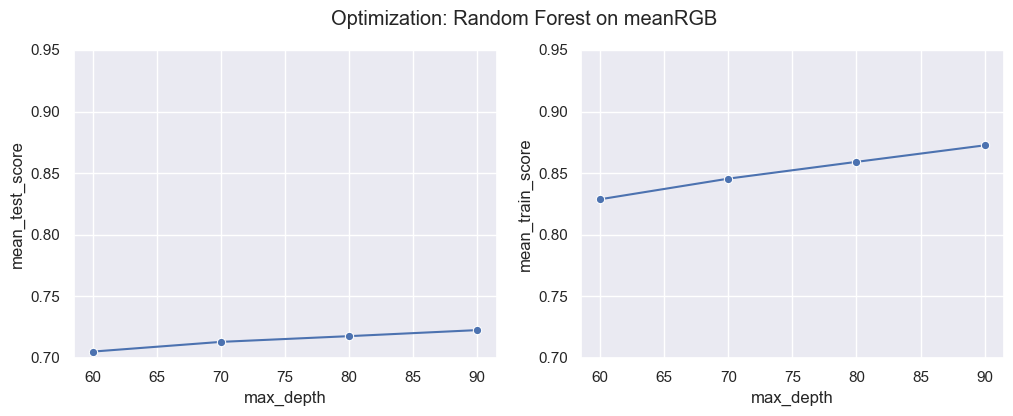

In [48]:
fig, axs = plt.subplots(1,2,figsize = (12,4))
#sns.lineplot(x = 'max_depth', y='mean_test_score', data = grid_rf_optimization, hue = 'criterion', style='max_features', marker = 'o')


sns.lineplot(x = 'max_depth', y='mean_test_score', data = grid_rf_optimization, \
             marker = 'o', ax= axs[0])

# sns.lineplot(x = 'max_depth', y='mean_test_score', data = grid_rf_v0, hue = 'C',\
#              marker = '*', ax= axs[0], ls = ':', palette="crest")


sns.lineplot(x = 'max_depth', y='mean_train_score', data = grid_rf_optimization, \
             marker = 'o', ax= axs[1])

# sns.lineplot(x = 'max_depth', y='mean_train_score', data = grid_rf_v0, hue = 'C',\
#              marker = '*', ax= axs[1], ls = ':', palette="crest")

for ax in axs:
    ax.set_ylim(0.7,0.95)
#     ax.set_xscale("log")
#     leg = ax.legend()
#     leg_lines = leg.get_lines()
# #     leg_lines[1].set_linestyle(":")
#     leg_lines[2].set_linestyle(":")
#     leg_lines[3].set_linestyle(":")
    
#plt.legend(title='Day of Week')
# plt.legend(labels = ['a', 'F', 'S', 'y'])
fig.suptitle("Optimization: Random Forest on meanRGB")

**Train-Test accuracy**

In [13]:
rf_accuracy_train = rf_clf.score(X_train, y_train)
rf_accuracy_test = rf_clf.score(X_test, y_test)

# rf_accuracy_train = grid_rf.score(X_train, y_train)
# rf_accuracy_test = grid_rf.score(X_test, y_test)

print("Train set accuracy %0.3f" % rf_accuracy_train)
print("Test  set accuracy %0.3f" % rf_accuracy_test)

Train set accuracy 0.995
Test  set accuracy 0.448


**Predictions**

In [22]:
y_pred = rf_clf.predict(X_test)
# y_pred = grid_rf.predict(X_test)

In [23]:
categories = product_class['prdtypecode'].tolist()

yy_pred = pd.Categorical(y_pred, categories = categories)
yy_test = pd.Categorical(y_test, categories = categories)

cm = pd.crosstab(yy_test, yy_pred, rownames=['Reality'], colnames=['Predictions'], dropna = False)

(27, 27)


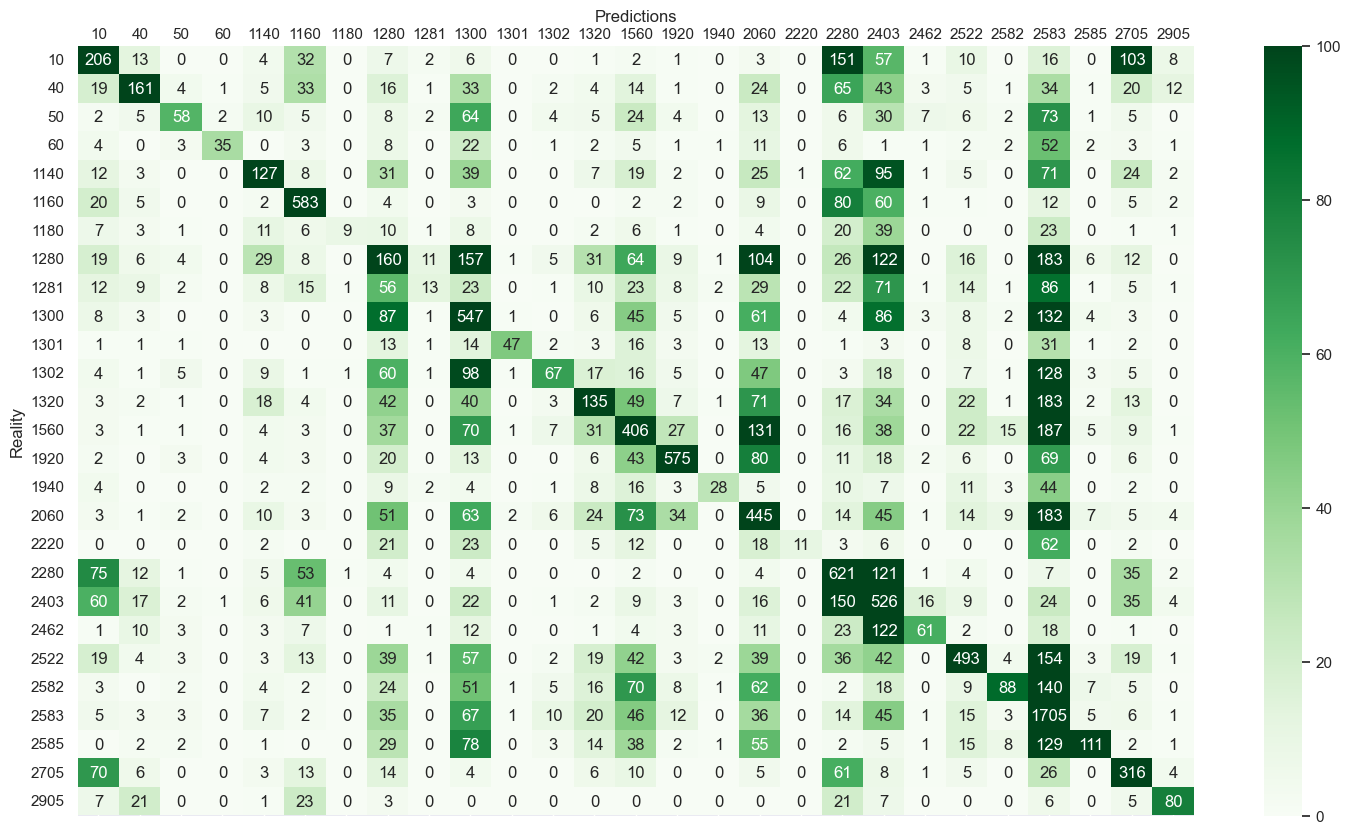

In [24]:
print(cm.shape)

fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(cm, annot = True, ax=ax, cmap='Greens', fmt ='d', vmin = 0, vmax = 100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_tick_params(length = 0)
ax.xaxis.set_label_position('top')

**Save confusion matrix**

In [25]:
export = True

if export:
    filename = training_path + model_date_time + '_img_rf' + '_confusionMatrix.csv'
    
    with open(filename, 'w') as file:
        cm.to_csv(filename, header = True, index = True)
        print(filename)

../Trained_models_and_metrics/2308130550_img_rf_confusionMatrix.csv


**Classification Report: macro & micro**

In [26]:
from sklearn.metrics import classification_report 

cr = classification_report(y_test, y_pred, output_dict = True)
cr.update({"accuracy": {"precision": None, "recall": None, "f1-score": cr["accuracy"], "support": cr['macro avg']['support']}})

micro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'prdtypecode'}).iloc[:-3,:]
macro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'metrics'}).iloc[-3:,:]

# display(micro_dt)
# display(macro_dt)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          10       0.36      0.33      0.35       623
          40       0.56      0.32      0.41       502
          50       0.57      0.17      0.27       336
          60       0.90      0.21      0.34       166
        1140       0.45      0.24      0.31       534
        1160       0.68      0.74      0.70       791
        1180       0.75      0.06      0.11       153
        1280       0.20      0.16      0.18       974
        1281       0.35      0.03      0.06       414
        1300       0.36      0.54      0.43      1009
        1301       0.85      0.29      0.44       161
        1302       0.56      0.13      0.22       498
        1320       0.36      0.21      0.26       648
        1560       0.38      0.40      0.39      1015
        1920       0.80      0.67      0.73       861
        1940       0.76      0.17      0.28       161
        2060       0.34      0.45      0.38       999
        2220       0.92    

**Top Classified Categories**

In [28]:
micro_rf.sort_values(by = 'f1-score', ascending=False).head(5)

,prdtypecode,precision,recall,f1-score,support
14,1920,0.799722,0.667828,0.727848,861.0
5,1160,0.675550,0.737042,0.704958,791.0
23,2583,0.451297,0.834966,0.585911,2042.0
21,2522,0.695346,0.493988,0.577622,998.0
26,2905,0.640000,0.459770,0.535117,174.0


**Worst Classified Categories**

In [29]:
micro_rf.sort_values(by = 'f1-score', ascending=True).head(5)

,prdtypecode,precision,recall,f1-score,support
8,1281,0.351351,0.031401,0.057650,414.0
6,1180,0.750000,0.058824,0.109091,153.0
17,2220,0.916667,0.066667,0.124294,165.0
7,1280,0.200000,0.164271,0.180383,974.0
11,1302,0.558333,0.134538,0.216828,498.0


**Less represented categories scores**

In [30]:
micro_rf.sort_values(by = 'support', ascending=True).head(5)

,prdtypecode,precision,recall,f1-score,support
6,1180,0.750000,0.058824,0.109091,153.0
10,1301,0.854545,0.291925,0.435185,161.0
15,1940,0.756757,0.173913,0.282828,161.0
17,2220,0.916667,0.066667,0.124294,165.0
3,60,0.897436,0.210843,0.341463,166.0


**Save Classification Report**

In [31]:
export = True

if export:
    filename = training_path + model_date_time +'_img_rf' + '_classificationReport.txt'
    
    with open(filename, 'w') as file:
        file.write(classification_report(y_test, y_pred))
        print(filename)

../Trained_models_and_metrics/2308130550_img_rf_classificationReport.txt


**Save / Load trained model ready to use**

In [34]:
save = True
reload = False

saved_model = training_path + model_date_time +'_img_rf_trained' + '.joblib'

from joblib import dump, load

if save:
    dump(rf_clf, saved_model) #
    print("Saved trained model:", saved_model)

if reload:
    svc_clf=load(saved_model)
    print("reloaded model: ", saved_model)

Saved trained model: ../Trained_models_and_metrics/2308130550_img_rf_trained.joblib


# Support Vectors Machine - SVC

In [7]:
X_train = image_train_preprocess # / 255
X_test = image_test_preprocess #/ 255

y_train = df_y_train.squeeze()
y_test = df_y_test.squeeze()

In [10]:
type(X_train[0,0])
# X_train.shape

numpy.uint8

In [11]:
from sklearn.model_selection import train_test_split

X_train_p1, X_train_p2, y_train_p1, y_train_p2 = train_test_split(X_train, y_train, test_size = 0.5, \
                                                                  random_state = myseed, stratify = y_train)


In [14]:
print(type(X_train_p1))
print(X_train_p1.shape)
print(type(X_train_p1[0,0]))

<class 'numpy.ndarray'>
(33966, 30000)
<class 'numpy.uint8'>


In [15]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

## estimator
# svc_clf = svm.SVC(C = 10, kernel = 'rbf', gamma=1e-9) #kernel = 'poly', gamma = 0.01
svc_clf = svm.SVC(random_state = 123) #kernel = 'poly', gamma = 0.01

## GridSearch
# params = {'gamma' : [1e-11,1e-10,1e-9,1e-8,1e-7,1e-6]}#,
# #          'C' : [1e3,1e4,1e5,1e6] }

# grid_svc = GridSearchCV(estimator = svc_clf, param_grid = params, scoring = 'accuracy', n_jobs = -1, cv = 3,\
#                           return_train_score=True, verbose = 3)

## training (timed)
t0 = time.time()

svc_clf.fit(X_train_p1, y_train_p1)
# grid_svc.fit(X_train, y_train)

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(X_train.shape[0], (t1-t0) ) )

model_date_time = date_time()
print(model_date_time)

For 67932 observations, training time = 18318.30 seconds
2308131415


In [16]:
# my_model.get_params()
svc_clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 123,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

**Grid optimization evaluation**

In [479]:
## Best estimators
print("Best estimator:", grid_svc.best_params_)


## Grid evaluation:
to_display = ['params', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']
grid_svc_optimization = pd.DataFrame.from_dict(grid_svc.cv_results_).loc[:,to_display]


## export grid_cv_results
export = True
time_stamp = model_date_time
if export:
    filename = 'grid_svc_cv_results' + time_stamp + '.csv'
    pd.DataFrame.from_dict(grid_svc.cv_results_).to_csv(filename, header=True, index=False)
    print(filename)

Best estimator: {'gamma': 1e-08}
grid_svc_cv_results_20230802_1920.csv


In [480]:
## Formating into dataframe: 

for key in params.keys():
    grid_svc_optimization[key] = [val[key] for val in grid_svc_optimization['params']]

#grid_svc_optimization = grid_svc_optimization.drop('params', axis = 1)

grid_svc_optimization

,params,mean_test_score,std_test_score,mean_train_score,std_train_score,gamma
0,{'gamma': 1e-11},0.190250,0.002007,0.195063,0.004597,1.000000e-11
1,{'gamma': 1e-10},0.256625,0.002129,0.289938,0.001034,1.000000e-10
2,{'gamma': 1e-09},0.315125,0.001485,0.748937,0.002726,1.000000e-09
3,{'gamma': 1e-08},0.325500,0.005168,0.996438,0.000405,1.000000e-08
4,{'gamma': 1e-07},0.142000,0.001735,0.999750,0.000088,1.000000e-07
5,{'gamma': 1e-06},0.126125,0.001137,0.999750,0.000088,1.000000e-06


**Compare to previous models ?**

In [ ]:
### load params from previous model for comparison (or skip)

grid_svc_v0 = pd.read_csv('grid_svc_cv_results_20230801_1553.csv')

import json

for key in ['C','gamma']:
#for key in params.keys():
    print(key)
    grid_svc_v0[key] = [json.loads(val.replace("'",'"'))[key] for val in grid_svc_v0['params']]

grid_svc_v0

**Plot Optimization of current model**

Text(0.5, 0.98, 'Optimization: SVM.SVC on meanRGB')

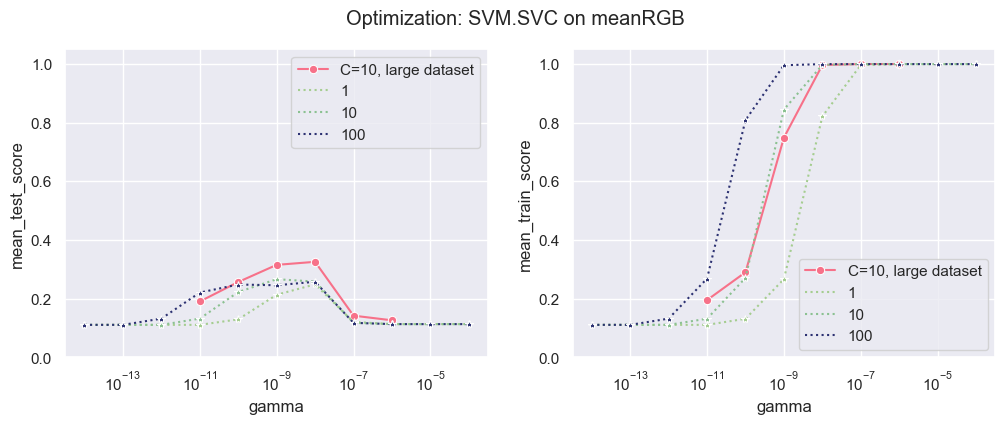

In [536]:
fig, axs = plt.subplots(1,2,figsize = (12,4))
#sns.lineplot(x = 'max_depth', y='mean_test_score', data = grid_rf_optimization, hue = 'criterion', style='max_features', marker = 'o')


sns.lineplot(x = 'gamma', y='mean_test_score', data = grid_svc_optimization,\
             marker = 'o', ax= axs[0], label = 'C=10, large dataset')

# sns.lineplot(x = 'gamma', y='mean_test_score', data = grid_svc_v0, hue = 'C',\
#              marker = '*', ax= axs[0], ls = ':', palette="crest")



sns.lineplot(x = 'gamma', y='mean_train_score', data = grid_svc_optimization,\
             marker = 'o', ax= axs[1], label = 'C=10, large dataset')

# sns.lineplot(x = 'gamma', y='mean_train_score', data = grid_svc_v0, hue = 'C',\
#              marker = '*', ax= axs[1], ls = ':', palette="crest")

for ax in axs:
    ax.set_ylim(0,1.05)
    ax.set_xscale("log")
    leg = ax.legend()
    leg_lines = leg.get_lines()
    leg_lines[1].set_linestyle(":")
    leg_lines[2].set_linestyle(":")
    leg_lines[3].set_linestyle(":")
    
#plt.legend(title='Day of Week')
# plt.legend(labels = ['a', 'F', 'S', 'y'])
fig.suptitle("Optimization: SVM.SVC on meanRGB")

In [155]:
# fig, axs = plt.subplots(1,2,figsize = (12,4), sharey = False)

# model_A = grid_svc_optimization[grid_svc_optimization['kernel']=='linear']
# sns.lineplot(x = 'C', y='mean_test_score', data = model_A, marker = 'o', ax= axs[0])
# sns.lineplot(x = 'C', y='mean_train_score', data = model_A, marker = 'o', ax= axs[0])
# axs[0].set_title("linear kernel")

# model_B = grid_svc_optimization[grid_svc_optimization['kernel']=='rbf']
# sns.lineplot(x = 'C', y='mean_test_score', data = model_B, marker = 'o', ax= axs[1])
# sns.lineplot(x = 'C', y='mean_train_score', data = model_B, marker = 'o', ax= axs[1])
# axs[1].set_title("rbf kernel")

# for ax in axs:
#     ax.set_ylim(0,1.05)

# fig.suptitle("Optimization: SVM.SVC vectorized images")

### Single Model Evaluation

**Train-Test accuracy**

In [17]:
t0 = time.time()

svc_accuracy_train = svc_clf.score(X_train, y_train)

t1 = time.time()

svc_accuracy_test = svc_clf.score(X_test, y_test)

t2 = time.time()
# svc_accuracy_train = grid_svc.score(X_train, y_train)
# svc_accuracy_test = grid_svc.score(X_test, y_test)


print("Train set accuracy %0.3f done in %0.2f minutes" %(svc_accuracy_train, ((t1-t0)/60) ))
print("Test set accuracy %0.3f done in %0.2f minutes" %(svc_accuracy_test, ((t2-t1)/60) ))

Train set accuracy 0.461 done in 934.43 minutes
Test set accuracy 0.381 done in 238.73 minutes


**Predictions**

In [18]:
t0 = time.time()

y_pred = svc_clf.predict(X_test)
#y_pred = grid_svc.predict(X_test)

t1 = time.time()
print("Done in %0.2f" %(t1-t0))

Done in 13971.66


In [21]:
categories = product_class['prdtypecode'].tolist()

yy_pred = pd.Categorical(y_pred, categories = categories)
yy_test = pd.Categorical(y_test, categories = categories)

cm = pd.crosstab(yy_test, yy_pred, rownames=['Reality'], colnames=['Predictions'], dropna = False)

(27, 27)


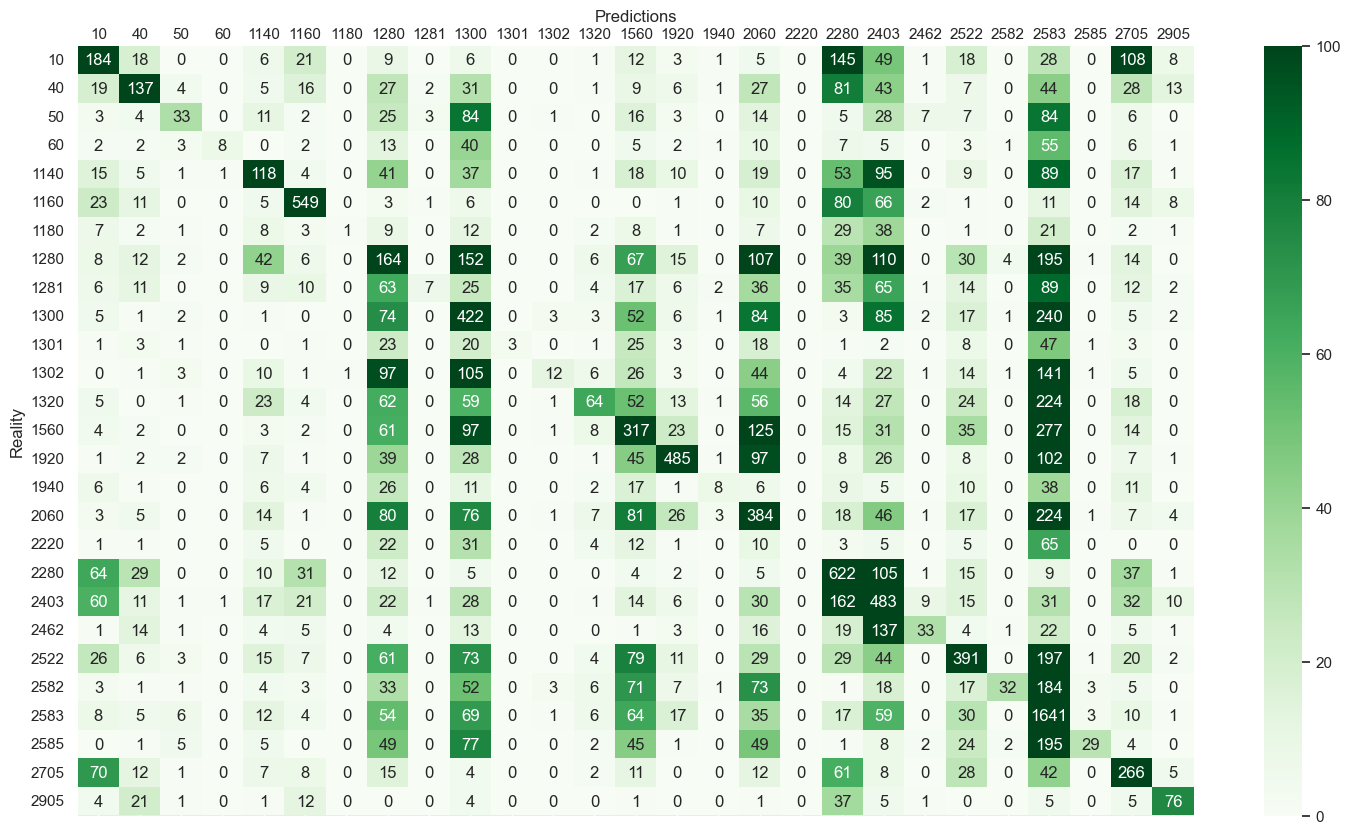

In [22]:
print(cm.shape)

fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(cm, annot = True, ax=ax, cmap='Greens', fmt ='d', vmin = 0, vmax = 100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_tick_params(length = 0)
ax.xaxis.set_label_position('top')

**Save confusion matrix**

In [50]:
export = True

if export:
    filename = training_path + model_date_time + '_img_svc' + '_confusionMatrix.csv'
    
    with open(filename, 'w') as file:
        cm.to_csv(filename, header = True, index = True)
        print(filename)

../Trained_models_and_metrics/2308131415_img_svc_confusionMatrix.csv


**Classification Report: macro & micro**

In [51]:
from sklearn.metrics import classification_report 

cr = classification_report(y_test, y_pred, output_dict = True)
cr.update({"accuracy": {"precision": None, "recall": None, "f1-score": cr["accuracy"], "support": cr['macro avg']['support']}})

micro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'prdtypecode'}).iloc[:-3,:]
macro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'metrics'}).iloc[-3:,:]

# display(micro_dt)
# display(macro_dt)

C:\Users\ramiro.rodriguez\.conda\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ramiro.rodriguez\.conda\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ramiro.rodriguez\.conda\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          10       0.35      0.30      0.32       623
          40       0.43      0.27      0.33       502
          50       0.46      0.10      0.16       336
          60       0.80      0.05      0.09       166
        1140       0.34      0.22      0.27       534
        1160       0.76      0.69      0.73       791
        1180       0.50      0.01      0.01       153
        1280       0.15      0.17      0.16       974
        1281       0.50      0.02      0.03       414
        1300       0.27      0.42      0.33      1009
        1301       1.00      0.02      0.04       161
        1302       0.52      0.02      0.05       498
        1320       0.48      0.10      0.16       648
        1560       0.30      0.31      0.30      1015
        1920       0.74      0.56      0.64       861
        1940       0.40      0.05      0.09       161
        2060       0.29      0.38      0.33       999
        2220       0.00    

C:\Users\ramiro.rodriguez\.conda\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ramiro.rodriguez\.conda\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ramiro.rodriguez\.conda\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

**Top Classified Categories**

In [53]:
micro_rf.sort_values(by = 'f1-score', ascending=False).head(5)

,prdtypecode,precision,recall,f1-score,support
5,1160,0.764624,0.694058,0.727634,791.0
14,1920,0.740458,0.563298,0.639842,861.0
23,2583,0.381628,0.803624,0.517502,2042.0
18,2280,0.415220,0.653361,0.507755,952.0
26,2905,0.554745,0.436782,0.488746,174.0


**Worst Classified Categories**

In [54]:
micro_rf.sort_values(by = 'f1-score', ascending=True).head(5)

,prdtypecode,precision,recall,f1-score,support
17,2220,0.000000,0.000000,0.000000,165.0
6,1180,0.500000,0.006536,0.012903,153.0
8,1281,0.500000,0.016908,0.032710,414.0
10,1301,1.000000,0.018634,0.036585,161.0
11,1302,0.521739,0.024096,0.046065,498.0


**Less represented categories scores**

In [55]:
micro_rf.sort_values(by = 'support', ascending=True).head(5)

,prdtypecode,precision,recall,f1-score,support
6,1180,0.5,0.006536,0.012903,153.0
10,1301,1.0,0.018634,0.036585,161.0
15,1940,0.4,0.049689,0.088398,161.0
17,2220,0.0,0.000000,0.000000,165.0
3,60,0.8,0.048193,0.090909,166.0


**Save Classification Report**

In [56]:
export = True

if export:
    filename = training_path + model_date_time +'_img_svc' + '_classificationReport.txt'
    
    with open(filename, 'w') as file:
        file.write(classification_report(y_test, y_pred))
        print(filename)

../Trained_models_and_metrics/2308131415_img_svc_classificationReport.txt


C:\Users\ramiro.rodriguez\.conda\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ramiro.rodriguez\.conda\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ramiro.rodriguez\.conda\envs\rakuten_env2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

**graphical representation of classification report**

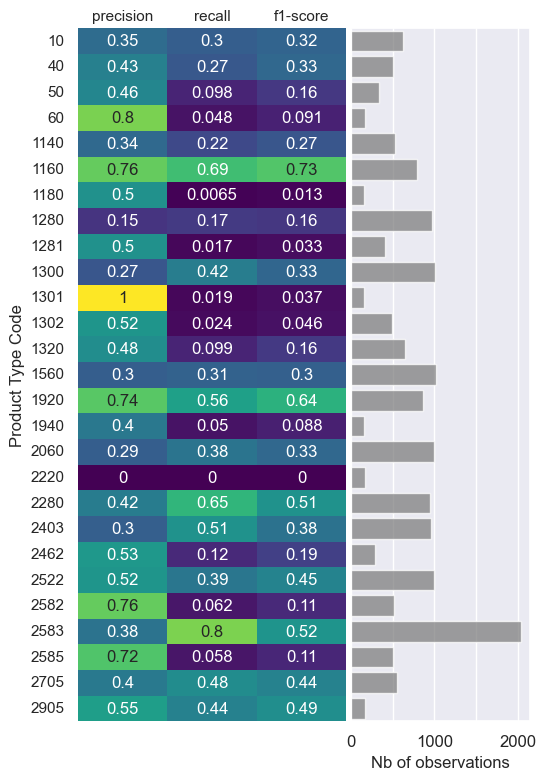

In [57]:
totN = micro_rf['support'].sum()
totN

art = sns.color_palette()

fig, axs = plt.subplots(1,2,figsize = (5.833,9),gridspec_kw={'width_ratios': [3.0, 2.0]})

sns.heatmap(micro_rf.set_index('prdtypecode')[['precision', 'recall', 'f1-score']], annot = True, cmap='viridis', 
            vmin = 0, vmax = 1, ax = axs[0], cbar = False)
sns.barplot(data = micro_rf, x = 'support', y='prdtypecode', color = 'grey', alpha = 0.75, ax = axs[1])

axs[0].xaxis.set_ticks_position('top')
axs[0].xaxis.set_tick_params(length = 0)
axs[0].xaxis.set_label_position('top')
axs[0].set_ylabel('Product Type Code')


axs[1].set_xticks([0,500,1000,1500,2000])
axs[1].set_xticklabels([0,'',1000,'',2000], fontsize=12)
axs[1].yaxis.set_tick_params(labelleft=False)
axs[1].set_ylabel('')
axs[1].set_xlabel('Nb of observations')


plt.subplots_adjust(wspace=0.02, hspace=0);

**Save / Load trained model ready to use**

In [59]:
save = True
reload = False

saved_model = training_path + model_date_time +'_img_svc_trained' + '.joblib'

from joblib import dump, load

if save:
    dump(svc_clf, saved_model) #
    print("Saved trained model:", saved_model)

if reload:
    svc_clf=load(saved_model)
    print("reloaded model: ", saved_model)

Saved trained model: ../Trained_models_and_metrics/2308131415_img_svc_trained.joblib


# Convolution Neural Network

In [6]:
XX_train = image_train_transformed
XX_test = image_test_transformed

## or try without renormalizing the pixels
# XX_train = image_train_preprocess.reshape((N_img_train, N_px, N_px, N_ch))
# XX_test = image_test_preprocess.reshape((N_img_train, N_px, N_px, N_ch))

## try to split the data in two
##.... to do...

## target:
yy_train = targets['y_train']
yy_test = targets['y_test']

In [7]:
N_px, N_px, N_ch = XX_train.shape[1:]

### Define model : CNN layers

In [76]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPooling2D
from keras.utils import to_categorical


## data dimensions
# Nb_features = X_train.shape[1]
Nb_classes = yy_train.shape[1]


## instantiate layers

inputs = Input(shape = (N_px, N_px, N_ch), name = "input")

first_layer = Conv2D(filters = 32,
                     kernel_size = (5, 5),
                     padding = 'valid',
                     activation = 'relu')

second_layer = MaxPooling2D(pool_size = (2, 2))

third_layer = Dropout(rate = 0.4)

fourth_layer = Flatten()

fifth_layer = Dense(units = 256,
                    activation = 'relu')

output_layer = Dense(units = Nb_classes,
                     activation='softmax')



## link layers & model

x=first_layer(inputs)
x=second_layer(x)

x=third_layer(x)
x=fourth_layer(x)
x=fifth_layer(x)

outputs=output_layer(x)


CNN_clf = Model(inputs = inputs, outputs = outputs)

**Define training process**

In [77]:
CNN_clf.compile(loss='categorical_crossentropy',
              optimizer='adam',                
              metrics=['accuracy'])

## display architecture
CNN_clf.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 96, 96, 32)        2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 48, 48, 32)        0         
                                                                 
 flatten_6 (Flatten)         (None, 73728)             0         
                                                                 
 dense_12 (Dense)            (None, 256)               18874624  
                                                           

**Train Model**

In [78]:
t0 = time.time()

training_history = CNN_clf.fit(XX_train, yy_train,
                             validation_split = 0.2,
                             epochs = 25,
                             batch_size = 400)

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(XX_train.shape[0], (t1-t0) ) )

model_date_time = date_time()
print(model_date_time)

Epoch 1/25
 80/136 [================>.............] - ETA: 47s - loss: 4.4890 - accuracy: 0.1034

KeyboardInterrupt: 

In [50]:
epochs = 25
x_epochs = np.arange(1,epochs + 1,1)

train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

(0.3, 0.5)

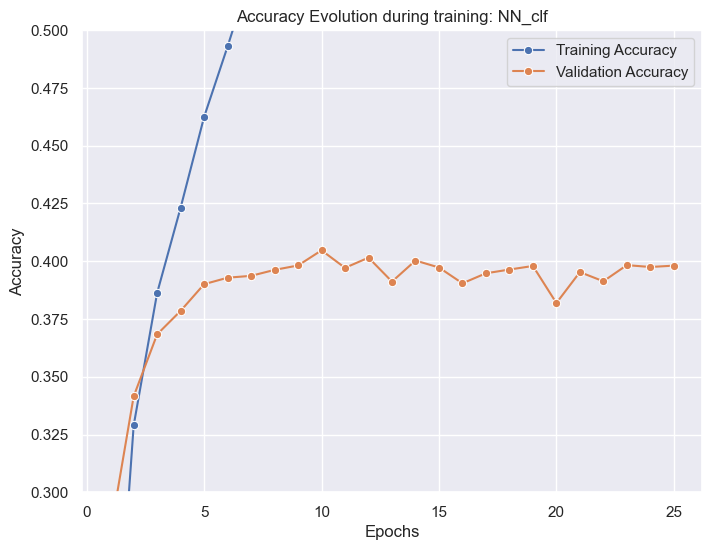

In [57]:
plt.figure(figsize=(8,6))

sns.lineplot(x = x_epochs, y = train_acc, marker = 'o', label = 'Training Accuracy')
sns.lineplot(x = x_epochs, y = val_acc, marker = 'o', label = 'Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Evolution during training: NN_clf')
plt.legend()#loc='right'
plt.ylim(0.3,0.5)

**train test accuracy**

In [75]:
loss_train, NN_accuracy_train = CNN_clf.evaluate(XX_train, yy_train)
# loss_test, NN_accuracy_test = CNN_clf.evaluate(XX_test, yy_test)

# svc_accuracy_train = grid_svc.score(X_train, y_train)
# svc_accuracy_test = grid_svc.score(X_test, y_test)

print("Train set accuracy = %0.3f and loss function = %0.2f" %(NN_accuracy_train, loss_train) )
# print("Test  set accuracy = %0.3f and loss function = %0.2f" %(NN_accuracy_test, loss_test))

2123/2123 [==============================] - 61s 29ms/step - loss: 0.8904 - accuracy: 0.8227
Train set accuracy = 0.823 and loss function = 0.89


**predictions**

In [59]:
yy_pred_vectors = CNN_clf.predict(XX_test)

## reverse One-hot-encoding
y_pred_class = yy_pred_vectors.argmax(axis = 1)
y_test_class = yy_test.argmax(axis = 1)

## reverse label encoder
y_pred = target_encoder.inverse_transform(y_pred_class)
y_test_prdCode = target_encoder.inverse_transform(y_test_class)   # should be equal to y_test


531/531 [==============================] - 12s 22ms/step


In [60]:
print(y_test_prdCode)
# print(y_test.values)

[1140 1320 2582 ... 2280 2522 1920]


In [61]:
categories = product_class['prdtypecode'].tolist()

y_pred_cat = pd.Categorical(y_pred, categories = categories)
y_test_cat = pd.Categorical(y_test_prdCode, categories = categories)

cm = pd.crosstab(y_test_cat, y_pred_cat, rownames=['Reality'], colnames=['Predictions'], dropna = False)

(27, 27)


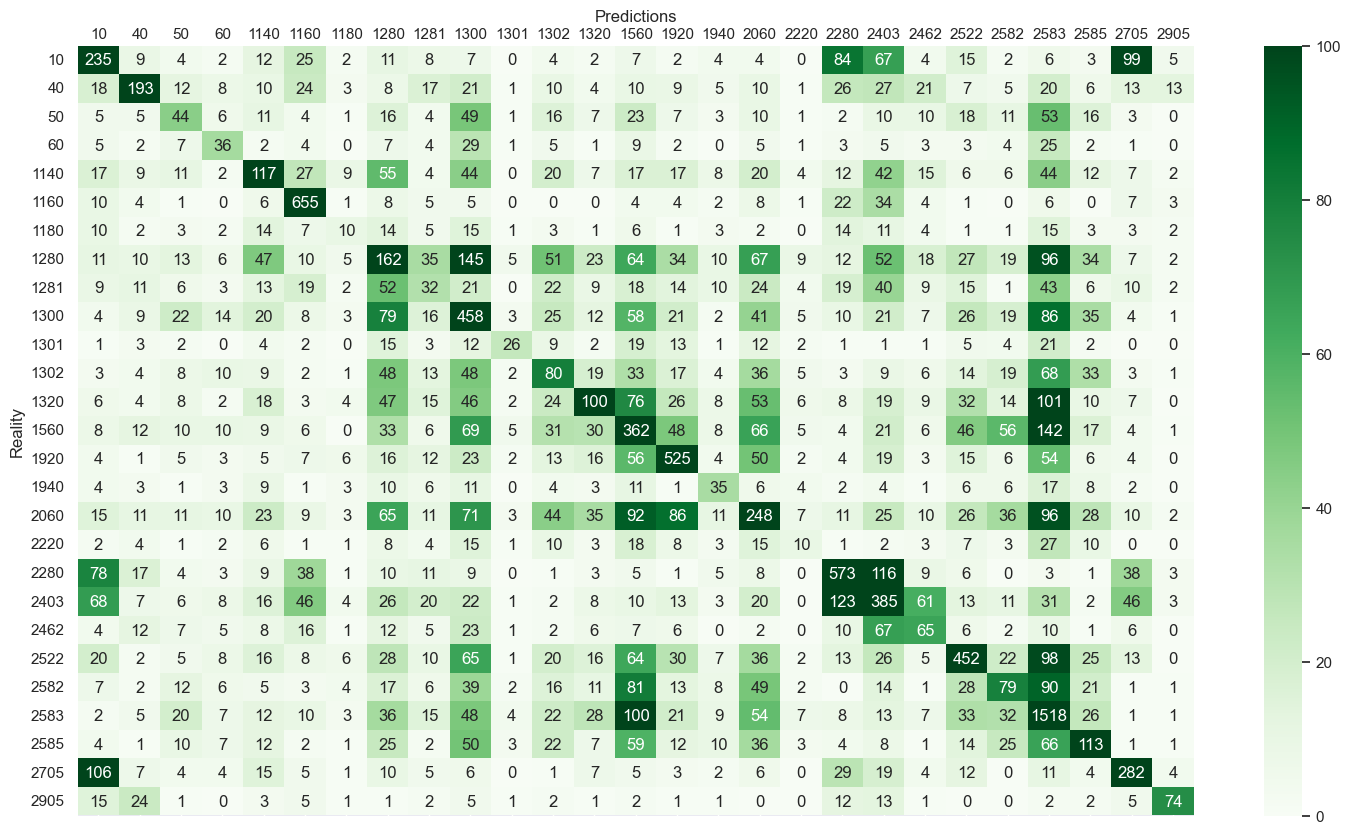

In [62]:
print(cm.shape)

fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(cm, annot = True, ax=ax, cmap='Greens', fmt ='d', vmin = 0, vmax = 100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_tick_params(length = 0)
ax.xaxis.set_label_position('top')

**Save confusion matrix**

In [63]:
export = True

if export:
    filename = training_path + model_date_time + '_img_CNN' + '_confusionMatrix.csv'
    
    with open(filename, 'w') as file:
        cm.to_csv(filename, header = True, index = True)
        print(filename)

../Trained_models_and_metrics/2308161317_img_CNN_confusionMatrix.csv


**Classification Report: macro & micro**

In [64]:
from sklearn.metrics import classification_report 

cr = classification_report(y_test_prdCode, y_pred, output_dict = True)
cr.update({"accuracy": {"precision": None, "recall": None, "f1-score": cr["accuracy"], "support": cr['macro avg']['support']}})

micro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'prdtypecode'}).iloc[:-3,:]
macro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'metrics'}).iloc[-3:,:]

# display(micro_dt)
# display(macro_dt)

In [65]:
print(classification_report(y_test_prdCode, y_pred))

              precision    recall  f1-score   support

          10       0.35      0.38      0.36       623
          40       0.52      0.38      0.44       502
          50       0.18      0.13      0.15       336
          60       0.22      0.22      0.22       166
        1140       0.27      0.22      0.24       534
        1160       0.69      0.83      0.75       791
        1180       0.13      0.07      0.09       153
        1280       0.20      0.17      0.18       974
        1281       0.12      0.08      0.09       414
        1300       0.34      0.45      0.39      1009
        1301       0.39      0.16      0.23       161
        1302       0.17      0.16      0.17       498
        1320       0.28      0.15      0.20       648
        1560       0.30      0.36      0.32      1015
        1920       0.56      0.61      0.58       861
        1940       0.21      0.22      0.21       161
        2060       0.28      0.25      0.26       999
        2220       0.12    

**Top Classified Categories**

In [66]:
micro_rf.sort_values(by = 'f1-score', ascending=False).head(5)

,prdtypecode,precision,recall,f1-score,support
5,1160,0.691658,0.828066,0.753740,791.0
23,2583,0.552201,0.743389,0.633688,2042.0
14,1920,0.561497,0.609756,0.584633,861.0
18,2280,0.567327,0.601891,0.584098,952.0
26,2905,0.611570,0.425287,0.501695,174.0


**Worst Classified Categories**

In [67]:
micro_rf.sort_values(by = 'f1-score', ascending=True).head(5)

,prdtypecode,precision,recall,f1-score,support
17,2220,0.123457,0.060606,0.081301,165.0
6,1180,0.131579,0.065359,0.087336,153.0
8,1281,0.115942,0.077295,0.092754,414.0
2,50,0.184874,0.130952,0.153310,336.0
11,1302,0.174292,0.160643,0.167189,498.0


**Less represented categories scores**

In [68]:
micro_rf.sort_values(by = 'support', ascending=True).head(5)

,prdtypecode,precision,recall,f1-score,support
6,1180,0.131579,0.065359,0.087336,153.0
10,1301,0.393939,0.161491,0.229075,161.0
15,1940,0.210843,0.217391,0.214067,161.0
17,2220,0.123457,0.060606,0.081301,165.0
3,60,0.215569,0.216867,0.216216,166.0


**Save Classification Report**

In [69]:
export = True

if export:
    filename = training_path + model_date_time +'_img_CNN' + '_classificationReport.txt'
    
    with open(filename, 'w') as file:
        file.write(classification_report(y_test_prdCode, y_pred))
        print(filename)

../Trained_models_and_metrics/2308161317_img_CNN_classificationReport.txt


**graphical representatino of classification report**

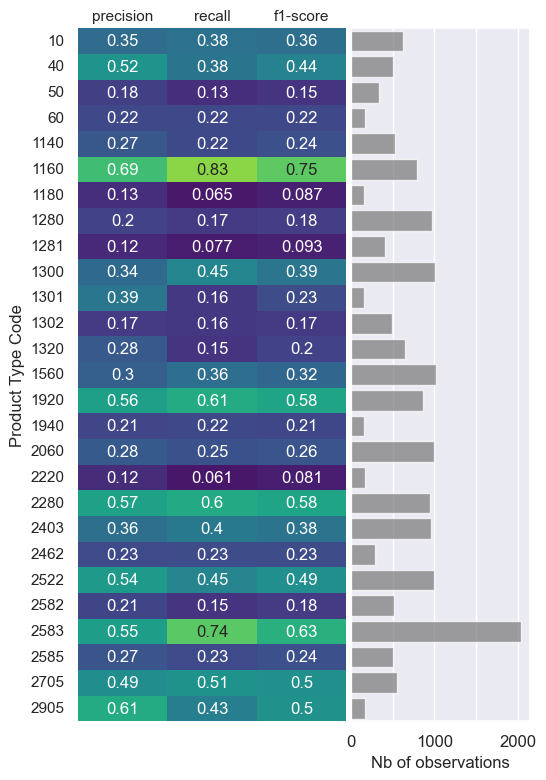

In [72]:
totN = micro_rf['support'].sum()
totN

art = sns.color_palette()

# micro_rf.to_numpy()
fig, axs = plt.subplots(1,2,figsize = (5.833,9),gridspec_kw={'width_ratios': [3.0, 2.0]})

sns.heatmap(micro_rf.set_index('prdtypecode')[['precision', 'recall', 'f1-score']], annot = True, cmap='viridis', 
            vmin = 0, vmax = 1, ax = axs[0], cbar = False)
sns.barplot(data = micro_rf, x = 'support', y='prdtypecode', color = 'grey', alpha = 0.75, ax = axs[1])
# sns.barplot(micro_rf.sort_values(by = 'f1-score', ascending=False).head(5),
#             x = 'support', y='prdtypecode', color = art[1], alpha = 0.75, ax = axs[1])


axs[0].xaxis.set_ticks_position('top')
axs[0].xaxis.set_tick_params(length = 0)
axs[0].xaxis.set_label_position('top')
axs[0].set_ylabel('Product Type Code')

axs[1].set_xticks([0,500,1000,1500,2000])
axs[1].set_xticklabels([0,'',1000,'',2000], fontsize=12)
axs[1].yaxis.set_tick_params(labelleft=False)
axs[1].set_ylabel('')
axs[1].set_xlabel('Nb of observations')

plt.subplots_adjust(wspace=0.02, hspace=0);


**Save / Load trained model ready to use**

In [73]:
save = True
reload = False

saved_model = training_path + model_date_time +'_img_CNN_trained' + '.joblib'

from joblib import dump, load

if save:
    dump(CNN_clf, saved_model) #
    print("Saved trained model:", saved_model)

if reload:
    svc_clf=load(saved_model)
    print("reloaded model: ", saved_model)

INFO:tensorflow:Assets written to: ram://42a62ccd-c84e-42d3-a3d6-b0f0bb9ff915/assets


INFO:tensorflow:Assets written to: ram://42a62ccd-c84e-42d3-a3d6-b0f0bb9ff915/assets


Saved trained model: ../Trained_models_and_metrics/2308161317_img_CNN_trained.joblib


### Parameter tunning

**My grid search**

In [45]:
def my_grid_search(params, X_train, y_train, X_test, y_test, img_shape, Nepoch = 200, batch_sz = 200):
    
    '''
    params : d1_unit, d1_act
    '''
    
    ## build model
    Nb_features = X_train.shape[1]
    Nb_classes = y_train.shape[1]
    
    param_trained = []
    train_histories = []
    
    acc_train = []
    acc_test = []

    losses_train = []
    losses_test = []

    
    for l1_filter in params['l1_filter']:
        for l1_kernel in params['l1_kernel']:
            for l1_act in params['l1_act']:
                for l3_rate in params['l3_rate']:
                    for l5_units in params['l5_units']:
                        for l5_act in params['l5_act']:
            
                            param_trained.append( (l1_filter, l1_kernel, l1_act, l3_rate, l5_units, l5_act) ) 
                            CNN_clf = initialize_model(img_shape, Nb_classes, \
                                                         l1_filters = l1_filter, l1_kernel = l1_kernel, l1_act=l1_act, \
                                                         l3_rate = l3_rate, \
                                                         l5_units = l5_units, l5_act = l5_act)

                            ## train model
                            t0 = time.time()
                            training_history = CNN_clf.fit(X_train, y_train,          
                                             epochs = Nepoch,               
                                             batch_size = batch_sz,          
                                             validation_split = 0.2)
                            
                            t1 = time.time()
                            print("Model total training time %0.2f minutes" %((t1-t0)/60))

                            train_histories.append(training_history)

                            ## train test accuracy
                            loss_train, accuracy_train = CNN_clf.evaluate(X_train, y_train)
                            t2 = time.time()
                            print("Train evaluation time %0.2f minutes" %((t2-t1)/60))

                            loss_test, accuracy_test = CNN_clf.evaluate(X_test, y_test)
                            t3 = time.time()
                            print("Test evaluation time %0.2f minutes" %((t3-t2)/60))

                            
                            losses_train.append(loss_train)
                            losses_test.append(loss_test)

                            acc_train.append(accuracy_train)
                            acc_test.append(accuracy_test)
            
    results = {'param_trained' : param_trained,
               'train_histories' : train_histories,
               'accuracy_train' : acc_train,
               'accuracy_test' : acc_test,
               'loss_train' : losses_train,
               'loss_test' : losses_test}
            

    return results


def initialize_model(img_shape, Nb_classes, \
                     l1_filters = 32, l1_kernel = (5,5), l1_act='relu', \
                     l3_rate = 0.2, \
                     l5_units = 128, l5_act = 'relu'):

    ## instantiate layers

    inputs = Input(shape = img_shape, name = "Input")

    first_layer = Conv2D(filters = l1_filters,
                         kernel_size = l1_kernel,
                         padding = 'valid',
                         activation = l1_act)
    
    second_layer = MaxPooling2D(pool_size = (2, 2))
    third_layer = Dropout(rate = l3_rate)
    fourth_layer = Flatten()
    
    fifth_layer = Dense(units = l5_units,
                        activation = l5_act)
    
    output_layer = Dense(units = Nb_classes,
                         activation='softmax')



    ## link layers & model

    x=first_layer(inputs)
    x=second_layer(x)
    x=third_layer(x)
    x=fourth_layer(x)
    x=fifth_layer(x)
    outputs=output_layer(x)

    CNN_clf = Model(inputs = inputs, outputs = outputs)

    
    ## compile
    CNN_clf.compile(loss='categorical_crossentropy',
              optimizer='adam',                
              metrics=['accuracy'])
    
    return CNN_clf


In [44]:
t0 = time.time()

parameters = {'l1_filter' : [32],
              'l1_kernel' : [(3,3), (5,5)],
              'l1_act' : ['relu'],
              'l3_rate' : [0.4],
              'l5_units' : [256],
              'l5_act' : ['relu']}

#X_train =X_train, y_train = yy_train, X_test = X_test, y_test=yy_test
#X_train, yy_train, X_test, yy_test
grid_results = my_grid_search(params = parameters, 
                              X_train = XX_train, y_train = yy_train, 
                              X_test = XX_test, y_test = yy_test,
                              img_shape = (N_px, N_px, N_ch), Nepoch = 25, batch_sz = 400)

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(X_train.shape[0], (t1-t0) ) )

Epoch 1/25
136/136 [==============================] - 153s 1s/step - loss: 3.4937 - accuracy: 0.2254 - val_loss: 2.4100 - val_accuracy: 0.3288
Epoch 2/25
136/136 [==============================] - 119s 877ms/step - loss: 2.2333 - accuracy: 0.3730 - val_loss: 2.2375 - val_accuracy: 0.3732
Epoch 3/25
136/136 [==============================] - 118s 866ms/step - loss: 1.9896 - accuracy: 0.4333 - val_loss: 2.1659 - val_accuracy: 0.3865
Epoch 4/25
136/136 [==============================] - 119s 872ms/step - loss: 1.8028 - accuracy: 0.4818 - val_loss: 2.1471 - val_accuracy: 0.3974
Epoch 5/25
136/136 [==============================] - 119s 877ms/step - loss: 1.6302 - accuracy: 0.5277 - val_loss: 2.1423 - val_accuracy: 0.4058
Epoch 6/25
136/136 [==============================] - 117s 858ms/step - loss: 1.4736 - accuracy: 0.5698 - val_loss: 2.1611 - val_accuracy: 0.4105
Epoch 7/25
136/136 [==============================] - 117s 859ms/step - loss: 1.3390 - accuracy: 0.6101 - val_loss: 2.2037 - va

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

**train test accuracy**

In [ ]:
d1_units = [ item[0] for item in grid_results['param_trained']]
d1_act = [ item[1] for item in grid_results['param_trained']]
accuracy_train = grid_results['accuracy_train']
accuracy_test = grid_results['accuracy_test']

In [ ]:
sns.lineplot(x = d1_units, y = accuracy_test, marker = 'o')

**Learning curve**

In [ ]:
grid_results['train_histories']

In [ ]:
Nepoch = 200
x_epochs = np.arange(1,Nepoch,1)
training_history = grid_results['train_histories']

In [ ]:
plt.figure(figsize=(10,8))

for i in range(len(training_history)):
    
    train_acc_hist = training_history[i].history['accuracy']
    val_acc_hist = training_history[i].history['val_accuracy']
    hist_params = str(grid_results['param_trained'][i])
    
    color =  sns.color_palette()[i]
    sns.lineplot(x = x_epochs, y = train_acc_hist, color = color, ls = ':', label = 'Training Accuracy - ' + hist_params)
    sns.lineplot(x = x_epochs, y = val_acc_hist, color = color, marker = 'o', label = 'Validation Accuracy - ' + hist_params)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Evolution during training: NN_clf')
plt.legend()#